In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('Z:/faily/train.csv')
test = pd.read_csv('Z:/faily/test.csv')

In [3]:
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
train.describe(include='O')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Anton Woody
freq,1,4602,5439,8,5915,8291,2


In [6]:
train.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
transported = train[train["Transported"] == True]
non_transported = train[train["Transported"] == False]
print(f"Transported: {len(transported)} ({len(transported) / len(train) * 100.0:0.1f})%")
print(f"Non transported: {len(non_transported)} ({len(non_transported) / len(train) * 100.0:0.1f})%")
print(f"Total: {len(train)}")

Transported: 4378 (50.4)%
Non transported: 4315 (49.6)%
Total: 8693


<Axes: xlabel='HomePlanet', ylabel='Transported'>

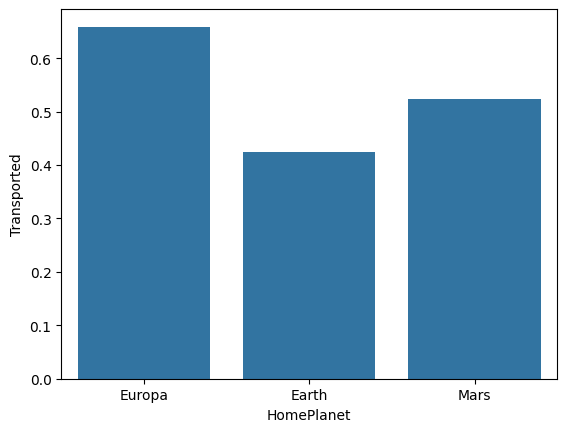

In [8]:
import seaborn as sns
sns.barplot(x='HomePlanet', y='Transported', data=train, errorbar=None)
#Люди с земли имеют больше шансов на выживание

In [9]:
train.HomePlanet.value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [10]:
train.Destination.value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [11]:
train.Destination.value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

<Axes: xlabel='Destination', ylabel='Transported'>

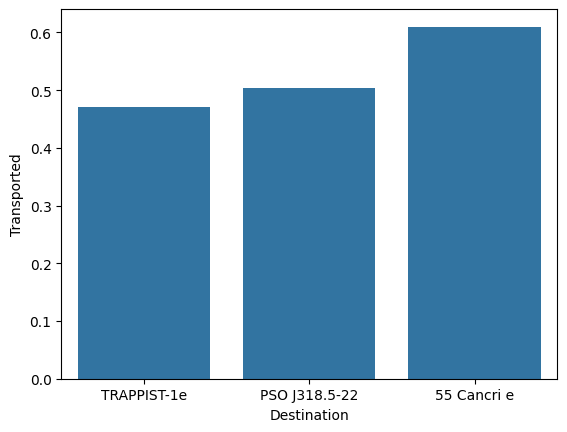

In [12]:
sns.barplot(x='Destination', y='Transported', data=train, errorbar=None)
#Учитывая что большинсто летело в траппист, остальные маршруты выглядят опасно

In [13]:
train.isnull().sum()
#Очень много пустых ячеек данных, надо как-то заполнять(

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<Axes: xlabel='Age', ylabel='Transported'>

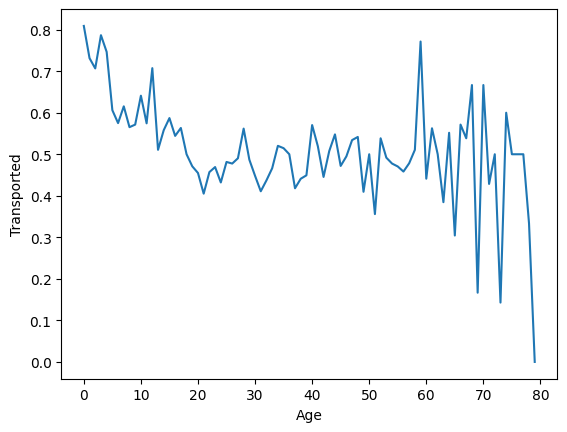

In [14]:
sns.lineplot(data=train, x="Age", y="Transported", errorbar=None)
#видно, что стабильно пропали молодые, стабильно средние возраста имеют средние шансы, нестабильно старшие то вообще смертники то вообще везунчики

In [15]:
tab = pd.crosstab(train['CryoSleep'], train['VIP'])
print(tab)

VIP        False  True 
CryoSleep              
False       5143    175
True        2941     21


In [16]:
train.VIP.value_counts()
#Виайпишников почти и нет

VIP
False    8291
True      199
Name: count, dtype: int64

In [17]:
train.groupby('VIP').Transported.value_counts()

VIP    Transported
False  True           4198
       False          4093
True   False           123
       True             76
Name: count, dtype: int64

<Axes: xlabel='VIP', ylabel='Transported'>

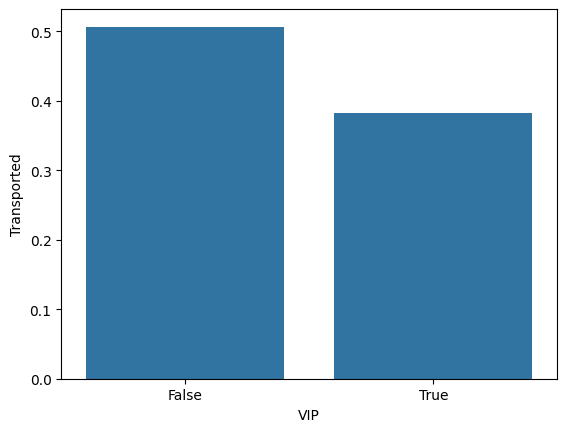

In [18]:
sns.barplot(x='VIP', y='Transported', data=train, errorbar=None)
#Виайпишники имеют чуть большие шансы

In [19]:
df_split = train['Cabin'].str.split('/', expand=True)
train['Deck'] = df_split[0]
train['Num'] = df_split[1]
train['Side'] = df_split[2]
test_split = test['Cabin'].str.split('/', expand=True)
test['Deck'] = test_split[0]
test['Num'] = test_split[1]
test['Side'] = test_split[2]
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,F,0,P
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,F,2,S
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,G,0,S
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,F,3,S
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,B,1,P


In [20]:
train['Sum'] = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
test['Sum'] = test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

<Axes: xlabel='Deck', ylabel='Transported'>

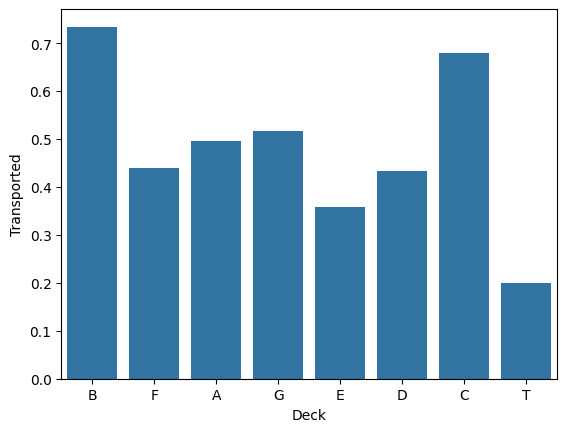

In [21]:
sns.barplot(x='Deck', y='Transported', data=train, errorbar=None)
#Видно что B и C самые неживучие, Т самые живучие, остальные средне, можно их так сгруппировать

In [22]:
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Sum
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,1091.0
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,F,0,P,774.0
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,F,2,S,1584.0
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,G,0,S,0.0
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,F,3,S,1018.0
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,B,1,P,0.0


<Axes: xlabel='Deck', ylabel='Transported'>

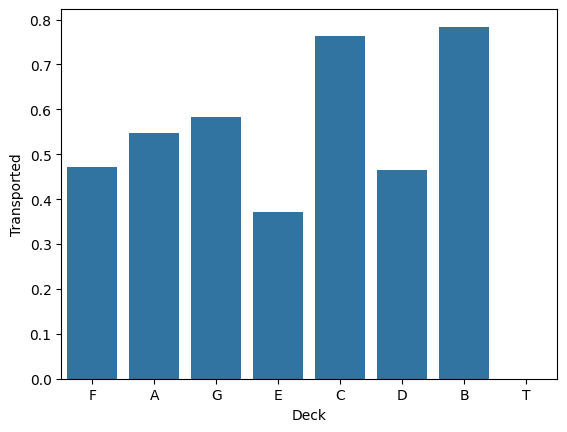

In [23]:
sns.barplot(x='Deck', y='Transported', data=train[train['Side'] == 'S'], errorbar=None)

<Axes: xlabel='Deck', ylabel='Transported'>

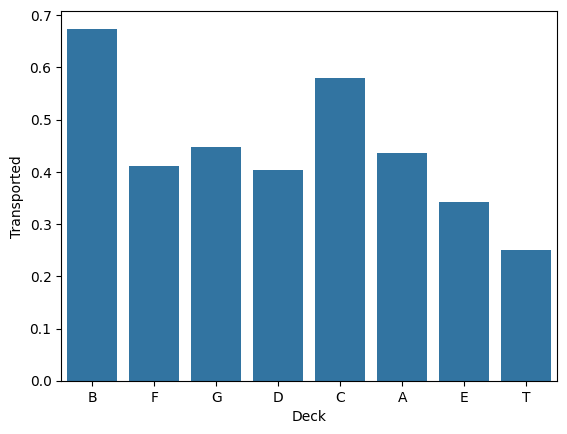

In [24]:
sns.barplot(x='Deck', y='Transported', data=train[train['Side'] == 'P'], errorbar=None)

In [25]:
train.Side.value_counts()

Side
S    4288
P    4206
Name: count, dtype: int64

<Axes: xlabel='Side', ylabel='Transported'>

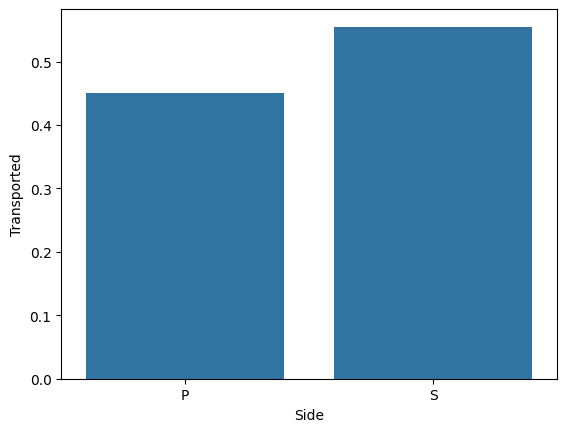

In [26]:
sns.barplot(x='Side', y='Transported', data=train, errorbar=None)

<Axes: xlabel='Num', ylabel='Transported'>

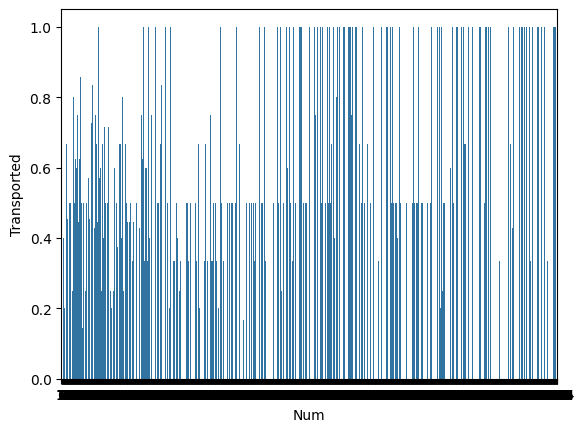

In [27]:
sns.barplot(data=train[train["Side"] == 'P'], x="Num", y="Transported", errorbar=None)

<Axes: xlabel='Num', ylabel='Transported'>

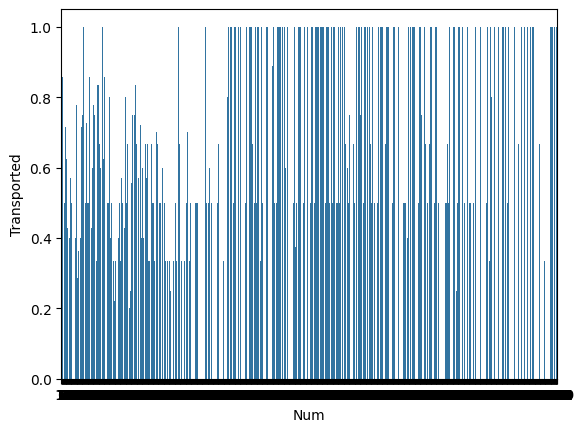

In [28]:
sns.barplot(data=train[train["Side"] == 'S'], x="Num", y="Transported", errorbar=None)

<Axes: xlabel='Spa', ylabel='Transported'>

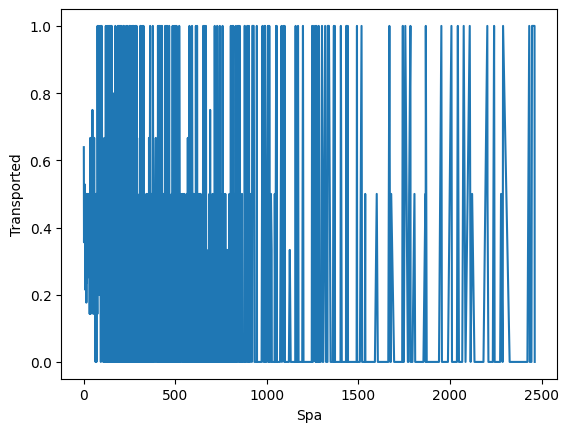

In [29]:
sns.lineplot(data=train[train["Spa"] < 2500], x="Spa", y="Transported", errorbar=None)

<Axes: xlabel='VRDeck', ylabel='Transported'>

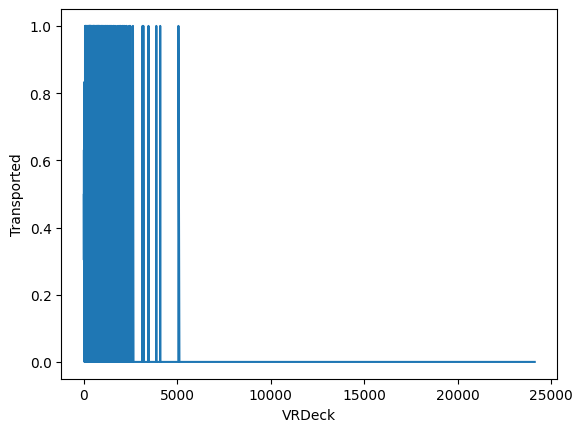

In [30]:
sns.lineplot(x='VRDeck', y='Transported', data=train, errorbar=None)

In [31]:
tab = pd.crosstab(train['Deck'], train['Side'])
print(tab)

Side     P     S
Deck            
A      117   139
B      353   426
C      341   406
D      248   230
E      429   447
F     1438  1356
G     1276  1283
T        4     1


<Axes: xlabel='RoomService', ylabel='Transported'>

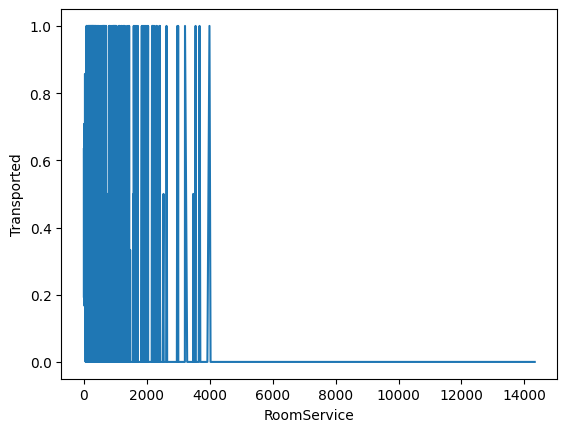

In [32]:
sns.lineplot(x='RoomService', y='Transported', data=train, errorbar=None)

<Axes: xlabel='FoodCourt', ylabel='Transported'>

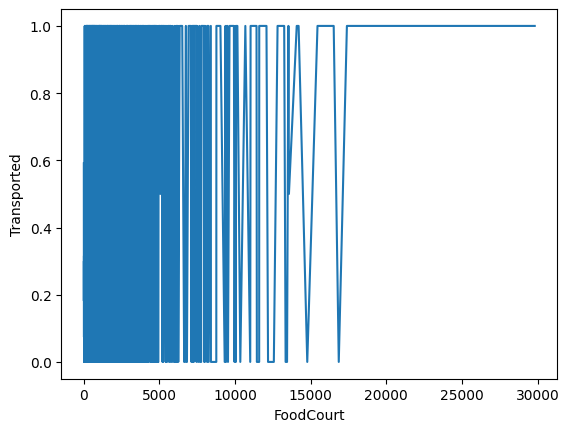

In [33]:
sns.lineplot(x='FoodCourt', y='Transported', data=train, errorbar=None)

<Axes: xlabel='Sum', ylabel='Transported'>

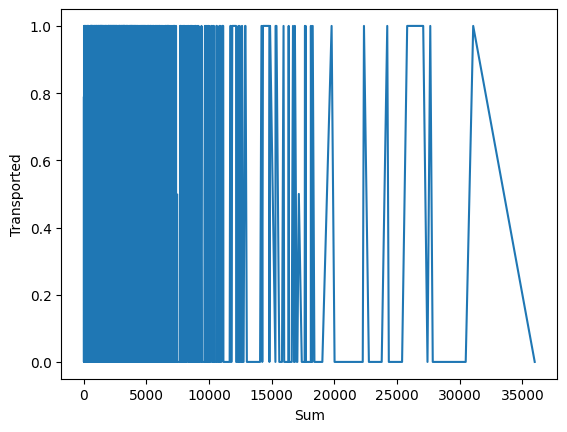

In [34]:
sns.lineplot(x='Sum', y='Transported', data=train, errorbar=None)

In [35]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Num,Side,Sum
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S,2832.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S,7418.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S,645.0


In [36]:
title = ('CryoSleep', 'VIP')
train_test_data = [train, test]
for t in title:
    for dataset in train_test_data:
        dataset[t] = dataset[t].map({True: 1, False: 0})
train['Transported'] = train['Transported'].map({True: 1, False: 0})
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Sum
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P,0.0
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S,736.0
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S,10383.0
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S,5176.0
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S,1091.0


In [37]:
train.HomePlanet.value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [38]:
for dataset in train_test_data:
    dataset['HomePlanet'] = dataset['HomePlanet'].map( {'Earth': 1, 'Europa': 3, 'Mars': 2} )
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Sum
0,0001_01,3.0,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P,0.0
1,0002_01,1.0,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S,736.0
2,0003_01,3.0,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S,10383.0
3,0003_02,3.0,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S,5176.0
4,0004_01,1.0,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S,1091.0


In [39]:
for dataset in train_test_data:
    dataset['Destination'] = dataset['Destination'].map( {'TRAPPIST-1e': 1, 'PSO J318.5-22': 2, '55 Cancri e': 3} )
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Sum
0,0001_01,3.0,0.0,B/0/P,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P,0.0
1,0002_01,1.0,0.0,F/0/S,1.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S,736.0
2,0003_01,3.0,0.0,A/0/S,1.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S,10383.0
3,0003_02,3.0,0.0,A/0/S,1.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S,5176.0
4,0004_01,1.0,0.0,F/1/S,1.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S,1091.0


In [40]:
deck_mapping = {'A': 2, 'B': 3, 'C': 3, 'D': 2, 'E': 2, 'F': 2, 'G': 2, 'T': 1}
for dataset in train_test_data:
    dataset['Deck'] = dataset['Deck'].map(deck_mapping)
    dataset['Side'] = dataset['Side'].map({'P': 1, 'S': 0})
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Sum
0,0001_01,3.0,0.0,B/0/P,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,3.0,0,1.0,0.0
1,0002_01,1.0,0.0,F/0/S,1.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,2.0,0,0.0,736.0
2,0003_01,3.0,0.0,A/0/S,1.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,2.0,0,0.0,10383.0
3,0003_02,3.0,0.0,A/0/S,1.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,2.0,0,0.0,5176.0
4,0004_01,1.0,0.0,F/1/S,1.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,2.0,1,0.0,1091.0


<Axes: xlabel='Num', ylabel='Transported'>

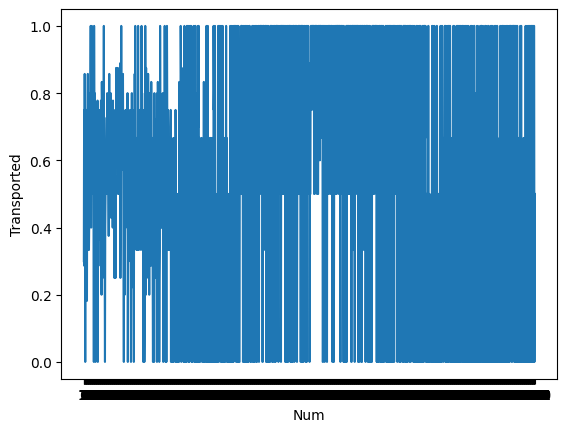

In [41]:
sns.lineplot(x='Num', y='Transported', data=train[train['Side'] == 0], errorbar=None)

In [42]:
train['Num'] = pd.to_numeric(train['Num'], errors='coerce')

<Axes: xlabel='RoomService', ylabel='Transported'>

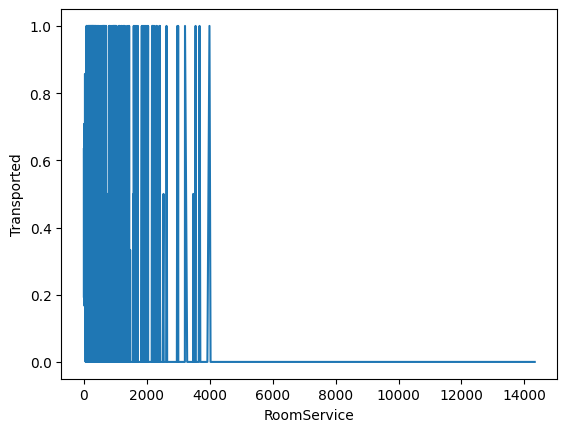

In [43]:
sns.lineplot(x='RoomService', y='Transported', data=train, errorbar=None)

In [44]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,Sum
0,0001_01,3.0,0.0,B/0/P,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,3.0,0.0,1.0,0.0
1,0002_01,1.0,0.0,F/0/S,1.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,2.0,0.0,0.0,736.0
2,0003_01,3.0,0.0,A/0/S,1.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,2.0,0.0,0.0,10383.0
3,0003_02,3.0,0.0,A/0/S,1.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,2.0,0.0,0.0,5176.0
4,0004_01,1.0,0.0,F/1/S,1.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,2.0,1.0,0.0,1091.0


In [45]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Deck            199
Num             199
Side            199
Sum               0
dtype: int64

In [46]:
for dataset in train_test_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

C:\Users\Maxim Zubarev\AppData\Local\Temp\ipykernel_3980\3804662582.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
C:\Users\Maxim Zubarev\AppData\Local\Temp\ipykernel_3980\

In [51]:
print(train.drop(['Cabin', 'Name'], axis=1))

     PassengerId  HomePlanet  CryoSleep  Destination  Age  VIP  RoomService  \
0        0001_01         3.0        0.0          1.0   39  0.0          0.0   
1        0002_01         1.0        0.0          1.0   24  0.0        109.0   
2        0003_01         3.0        0.0          1.0   58  1.0         43.0   
3        0003_02         3.0        0.0          1.0   33  0.0          0.0   
4        0004_01         1.0        0.0          1.0   16  0.0        303.0   
...          ...         ...        ...          ...  ...  ...          ...   
8688     9276_01         3.0        0.0          3.0   41  1.0          0.0   
8689     9278_01         1.0        1.0          2.0   18  0.0          0.0   
8690     9279_01         1.0        0.0          1.0   26  0.0          0.0   
8691     9280_01         3.0        0.0          3.0   32  0.0          0.0   
8692     9280_02         3.0        0.0          1.0   44  0.0        126.0   

      FoodCourt  ShoppingMall     Spa  VRDeck  Tran

In [59]:
string_titles = ['Cabin', 'Name']
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
train1 = pd.DataFrame(imputer.fit_transform(train.drop(string_titles, axis=1)), 
                         columns=train.drop(string_titles, axis=1).columns)
test1 = pd.DataFrame(imputer.fit_transform(test.drop(string_titles, axis=1)), 
                         columns=test.drop(string_titles, axis=1).columns)
train1.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Num             0
Side            0
Sum             0
dtype: int64

In [60]:
train_imputed.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,Sum
0,101.0,3.0,0.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0
1,201.0,1.0,0.0,1.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,2.0,0.0,0.0,736.0
2,301.0,3.0,0.0,1.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,2.0,0.0,0.0,10383.0
3,302.0,3.0,0.0,1.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,2.0,0.0,0.0,5176.0
4,401.0,1.0,0.0,1.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,2.0,1.0,0.0,1091.0


In [61]:
#features_drop = ['Cabin', 'Name']
#train1 = train_imputed.drop(features_drop, axis=1).copy()
#test1 = test_imputed.drop(features_drop, axis=1).copy()
train1 = train1.drop(["PassengerId"], axis=1)
train1.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Num             0
Side            0
Sum             0
dtype: int64

<Axes: >

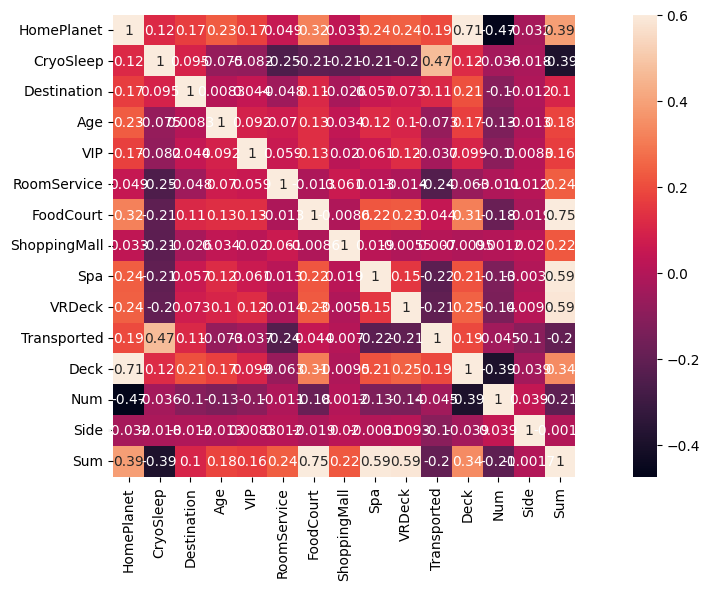

In [62]:
plt.figure(figsize=(15,6))
sns.heatmap(train1.corr(), vmax=0.6, square=True, annot=True)

In [63]:
X_train = train1.drop('Transported', axis=1)
y_train = train1['Transported']

X_test = test1.drop("PassengerId", axis=1).copy()

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier

In [65]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' percent')

77.76 percent


C:\Users\Maxim Zubarev\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_svc)

79.06


In [94]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_linear_svc)

79.29


In [95]:
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (acc_knn)

82.88


In [96]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
print (acc_decision_tree)

99.98


In [97]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print (acc_random_forest)

99.98


In [98]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print (acc_gnb)

71.15


In [72]:
clf = Perceptron(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_perceptron = clf.predict(X_test)
acc_perceptron = round(clf.score(X_train, y_train) * 100, 2)
print (acc_perceptron)

77.61


In [73]:
clf = SGDClassifier(max_iter=10, tol=None)
clf.fit(X_train, y_train)
y_pred_sgd = clf.predict(X_test)
acc_sgd = round(clf.score(X_train, y_train) * 100, 2)
print (acc_sgd)

78.14


In [83]:
clf = XGBClassifier(max_iter=10, tol=None)
clf.fit(X_train, y_train)
y_pred_xgb = clf.predict(X_test)
acc_sgd = round(clf.score(X_train, y_train) * 100, 2)
print (acc_sgd)

91.6


C:\Users\Maxim Zubarev\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:34:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "max_iter" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [75]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,99.98
5,Random Forest,99.98
3,KNN,82.88
2,Linear SVC,79.29
1,Support Vector Machines,79.06
0,Logistic Regression,77.76
7,Perceptron,77.61
6,Naive Bayes,71.15
8,Stochastic Gradient Decent,64.27


In [99]:
final_mapping = {1: True, 0: False}

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Transported": y_pred_linear_svc
    })
submission['Transported'] = submission['Transported'].map(final_mapping)

#submission.to_csv('submission.csv', index=False)

In [100]:
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [101]:
submission.to_csv('Z:/faily/submission.csv', index=False)